QUESTION 2 - ANALYZING THE CORRELATION BETWEEN NUMBER OF VACCINES ADMINISTERED FROM DIFFERENT MANUFACTURERS AND THE STOCK VOLUMES OF THEIR COMPANIES


AIM: This portion of the project aims to assess vaccine rollout per country and furthermore per manufacturer with two main goals. The countries will be arranged by region in order to facilitate visualization and obtain a more worldwide picture.

The main goal of this section is to assess vaccine rollout per manufacturer and, using the data provided by my teammate in part 1, analyze a potential correlation between this rollout and stock value of each vaccination company. In other words, can the statistical analysis allow us to say that as number of vaccine doses purchased by governments from one particular company increases, so does the stock volume of that company?

Data was collected from Our World in Data (owid) covid-19-data Github repository, specifically the file vaccinations-by-manufacturers.csv in the vaccinations folder - https://github.com/owid/covid-19-data.git.

Research Question: What was the rollout of covid-19 vaccines around the world and can the manufacturer-specific rollout explain the total stock volume that each company has?

Note: One major limitation is that the amount of countries included in this dataset is incomplete. This is due to the fact that only the countries included collected and released data regarding the vaccination rollout per manufacturer. Thus, for certain regions, the analysis will not provide a full picture of the situation due to the absence of certain countries in said region. No dataset is perfect and the conclusions that will be made from this analysis will be regarding the data that is available on this topic.

PART 1 - Explore CSV files containing daily vaccination data per country as well as daily vaccination data broken down by manufacturer.

In [30]:
#Import dependencies

import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.stats as st
from scipy.stats import linregress

In [32]:
#Load the appropriate datasets and read them

manufacturer_data_to_load = Path("Resources/vaccinations-by-manufacturer.csv")

manufacturer_data = pd.read_csv(manufacturer_data_to_load)

FileNotFoundError: [Errno 2] No such file or directory: 'Resources/vaccinations-by-manufacturer.csv'

In [3]:
manufacturer_data.head()

,location,date,vaccine,total_vaccinations
0,Argentina,2020-12-29,Oxford/AstraZeneca,1
1,Argentina,2020-12-29,Sinopharm/Beijing,1
2,Argentina,2020-12-29,Sputnik V,20493
3,Argentina,2020-12-30,Sputnik V,40595
4,Argentina,2020-12-31,Sputnik V,43401


In [4]:
#Rename columns for a more refined looking dataset
manufacturer_data_cleaned = manufacturer_data.rename(columns={"total_vaccinations": "Total Vaccinations per Manufacturer"})

In [5]:
manufacturer_data_cleaned.head()

,location,date,vaccine,Total Vaccinations per Manufacturer
0,Argentina,2020-12-29,Oxford/AstraZeneca,1
1,Argentina,2020-12-29,Sinopharm/Beijing,1
2,Argentina,2020-12-29,Sputnik V,20493
3,Argentina,2020-12-30,Sputnik V,40595
4,Argentina,2020-12-31,Sputnik V,43401


In [6]:
#Load csv file provided by teammate in order to arrange countries by set of defined regions
regions_df_to_load = Path("Resources/output_countries_list_UN_referential.csv")
regions_df = pd.read_csv(regions_df_to_load)

regions_df.head()

,Unnamed: 0,id,iso2Code,name,region,capitalCity,longitude,latitude
0,0,ABW,AW,Aruba,Latin America & Caribbean,Oranjestad,-70.0167,12.5167
1,1,AFE,ZH,Africa Eastern and Southern,Aggregates,NaN,NaN,NaN
2,2,AFG,AF,Afghanistan,South Asia,Kabul,69.1761,34.5228
3,3,AFR,A9,Africa,Aggregates,NaN,NaN,NaN
4,4,AFW,ZI,Africa Western and Central,Aggregates,NaN,NaN,NaN


In [7]:
#Clean up dataset above by only keeping essential columns for region classification
columns_kept = ["name", "region"]
regions_df_cleaned = regions_df[columns_kept]

regions_df_refined = regions_df_cleaned.rename(columns={"name": "location"})
regions_df_refined.head()

,location,region
0,Aruba,Latin America & Caribbean
1,Africa Eastern and Southern,Aggregates
2,Afghanistan,South Asia
3,Africa,Aggregates
4,Africa Western and Central,Aggregates


In [8]:
#load csv file provided by teammate in order to arrange countries by set of defined regions
merged_manufacturer_df = pd.merge(regions_df_refined, manufacturer_data_cleaned, on="location")

In [9]:
merged_manufacturer_df.head()

,location,region,date,vaccine,Total Vaccinations per Manufacturer
0,Argentina,Latin America & Caribbean,2020-12-29,Oxford/AstraZeneca,1
1,Argentina,Latin America & Caribbean,2020-12-29,Sinopharm/Beijing,1
2,Argentina,Latin America & Caribbean,2020-12-29,Sputnik V,20493
3,Argentina,Latin America & Caribbean,2020-12-30,Sputnik V,40595
4,Argentina,Latin America & Caribbean,2020-12-31,Sputnik V,43401


In [10]:
#Export as usable csv files for the second step which is the visualizations
manufacturer_path = "Output/merged_manufacturer_df.csv"
merged_manufacturer_df.to_csv(manufacturer_path)

In [11]:
#Find unique manufacturers to help teammate know which stock data to collect
unique_manufacturers = manufacturer_data_cleaned["vaccine"].unique()
print(unique_manufacturers)

['Oxford/AstraZeneca' 'Sinopharm/Beijing' 'Sputnik V' 'Pfizer/BioNTech'
 'Moderna' 'CanSino' 'Sputnik Light' 'Johnson&Johnson' 'Novavax'
 'Sanofi/GSK' 'Valneva' 'Medicago' 'Sinovac' 'Covaxin' 'SKYCovione']


PART 2 - Visualizations of data, allowing us to get a clear picture of the respective vaccine rollouts


2.1 VACCINE ROLLOUT PER MANUFACTURER, PER REGION

In [12]:
#Load csv dataset containing vaccine rollout per manufacturer for visualization
manufacturer_merged_data_to_load = Path("Output/merged_manufacturer_df.csv")
manufacturers_df = pd.read_csv(manufacturer_merged_data_to_load)

manufacturers_df.head()

,Unnamed: 0,location,region,date,vaccine,Total Vaccinations per Manufacturer
0,0,Argentina,Latin America & Caribbean,2020-12-29,Oxford/AstraZeneca,1
1,1,Argentina,Latin America & Caribbean,2020-12-29,Sinopharm/Beijing,1
2,2,Argentina,Latin America & Caribbean,2020-12-29,Sputnik V,20493
3,3,Argentina,Latin America & Caribbean,2020-12-30,Sputnik V,40595
4,4,Argentina,Latin America & Caribbean,2020-12-31,Sputnik V,43401


In [13]:
#Identify unique regions in this dataframe to break down the visualizations
unique_regions = manufacturers_df["region"].unique()
print(unique_regions)

['Latin America & Caribbean ' 'Europe & Central Asia' 'North America'
 'Aggregates' 'East Asia & Pacific' 'Middle East & North Africa'
 'South Asia' 'Sub-Saharan Africa ']


In [14]:
#Identify unique countries in this dataframe to inform analysis of regions as more or less complete
unique_countries = manufacturers_df["location"].unique()
print(unique_countries)

['Argentina' 'Austria' 'Belgium' 'Bulgaria' 'Canada' 'Switzerland' 'Chile'
 'Cyprus' 'Czechia' 'Germany' 'Denmark' 'Ecuador' 'Spain' 'Estonia'
 'European Union' 'Finland' 'France' 'Croatia' 'Hungary' 'Ireland'
 'Iceland' 'Italy' 'Japan' 'Liechtenstein' 'Lithuania' 'Luxembourg'
 'Latvia' 'Malta' 'Netherlands' 'Norway' 'Nepal' 'Peru' 'Poland'
 'Portugal' 'Romania' 'Slovenia' 'Sweden' 'Ukraine' 'Uruguay'
 'United States' 'South Africa']


In [15]:
#Rename regions to allow for manipulation of data as regions containing "&" were problematic
manufacturers_df["region"] = manufacturers_df["region"].str.strip()
replacements = {
    "Latin America & Caribbean": "Latin America and Caribbean", 
    "Europe & Central Asia": "Europe and Central Asia", "East Asia & Pacific": "East Asia and Pacific", 
    "Middle East & North Africa": "Middle East and North Africa"
    }
manufacturers_df["region"] = manufacturers_df["region"].replace(replacements)
manufacturers_df.head()

,Unnamed: 0,location,region,date,vaccine,Total Vaccinations per Manufacturer
0,0,Argentina,Latin America and Caribbean,2020-12-29,Oxford/AstraZeneca,1
1,1,Argentina,Latin America and Caribbean,2020-12-29,Sinopharm/Beijing,1
2,2,Argentina,Latin America and Caribbean,2020-12-29,Sputnik V,20493
3,3,Argentina,Latin America and Caribbean,2020-12-30,Sputnik V,40595
4,4,Argentina,Latin America and Caribbean,2020-12-31,Sputnik V,43401


In [16]:
#Define a function that produces a bar graph displaying the total vaccinations per manufacturer for every region
def region_per_manufacturer_bar_chart(manufacturers_df, region_name, color='b'):
    plot_title = f"Total Vaccinations per Manufacturer in {region_name}"
    
    #Ensure that the total vaccinations column is numeric
    manufacturers_df["Total Vaccinations per Manufacturer"] = pd.to_numeric(manufacturers_df["Total Vaccinations per Manufacturer"], errors='coerce')

    #Get the maximum vaccinations per manufacturer for each country, data that will be summed to get the total vaccinations per region
    max_vaccinations = manufacturers_df.groupby(['location', 'region', 'vaccine'])['Total Vaccinations per Manufacturer'].max().reset_index()
    
    #Filter for the specified region
    region_df = max_vaccinations[max_vaccinations["region"] == region_name]
    
    #Now group by 'vaccine' to sum the total vaccinations for that region
    grouped_data = region_df.groupby('vaccine')['Total Vaccinations per Manufacturer'].sum().reset_index()
    
    # Plotting
    plt.bar(grouped_data["vaccine"], grouped_data["Total Vaccinations per Manufacturer"], color=color)
    plt.title(plot_title)
    plt.xlabel("Vaccine Manufacturer")
    plt.ylabel("Total Vaccinations")
    plt.xticks(rotation=90)
    plt.grid()
    plt.tight_layout()
    plt.savefig(f"Output/{plot_title.strip().lower().replace(' ', '_')}.png")
    plt.show()

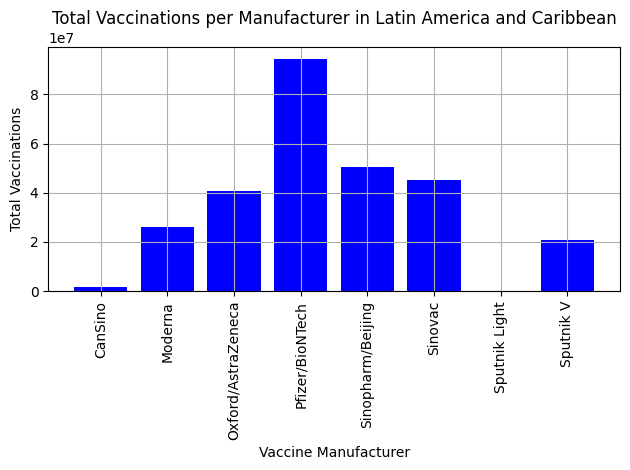

In [17]:
region_per_manufacturer_bar_chart(manufacturers_df, "Latin America and Caribbean", 'b')

As seen on the graph, the top 3 vaccines administered in South America/Caribbean are SinoPharm, AstraZeneca and Pfizer. This should be taken into consideration ahead of correlation calculations between vaccine rollout per manufacturer and stock value.

Caveat/limitation: major population contributors such as Brazil are missing from this dataframe, meaning this is not entirely a complete picture. That said, there are more countries than was the case for other regions, resulting in a moderately complete picture here.

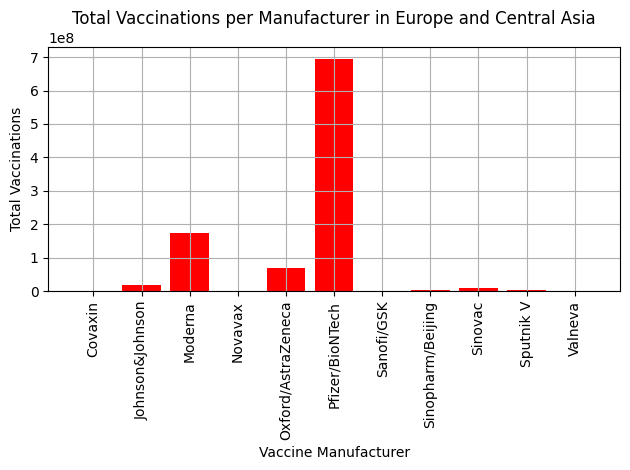

In [18]:
region_per_manufacturer_bar_chart(manufacturers_df, "Europe and Central Asia", 'r')

As seen on the graph, the top 3 vaccines administered in Europe/Central Asia are Pfizer, Moderna and AstraZeneca. This should be taken into consideration ahead of correlation calculations between vaccine rollout per manufacturer and stock value.

Note: Majority of European countries are included, resulting in a fairly complete picture of reality. However, it cannot be said that this applies to Central Asia as no Central Asian countries are included in this analysis. That said, the UN dataset grouped Europe and Central Asia in one region, hence this analysis

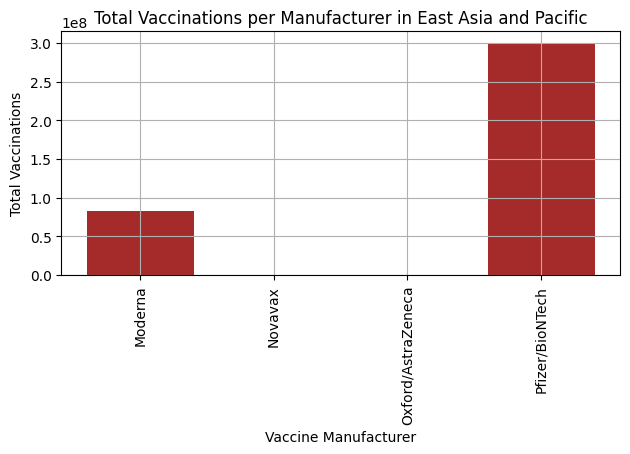

In [19]:
region_per_manufacturer_bar_chart(manufacturers_df, "East Asia and Pacific", 'brown')

As seen on the graph, the top vaccines administered in East Asia/Pacific are Pfizer and Moderna. This should be taken into consideration ahead of correlation calculations between vaccine rollout per manufacturer and stock value.

Caveat: This dataframe only includes Japan for this region, resulting in a far from complete picture as major players such as South Korea and importantly China are excluded. Thus, this would be more of a particular snapshot as it could be hypothesized that Sinovac would likely be a major player in the region due to China alone.

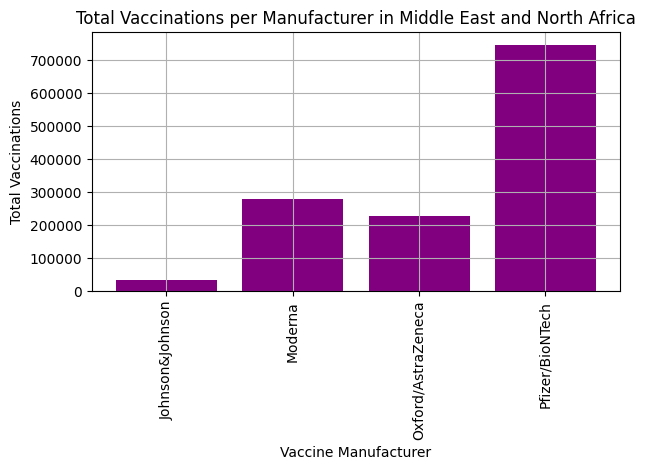

In [20]:
region_per_manufacturer_bar_chart(manufacturers_df, "Middle East and North Africa", 'purple')

As seen on the graph, the top vaccines administered in Middle East/North Africa are Pfizer, Moderna and AstraZeneca. This should be taken into consideration ahead of correlation calculations between vaccine rollout per manufacturer and stock value.

Caveat: This dataframe only includes Malta for this region, resulting in a far from complete picture as major players such as Egypt, Saudi Arabia and more are excluded. Thus, this would be more of a particular snapshot.

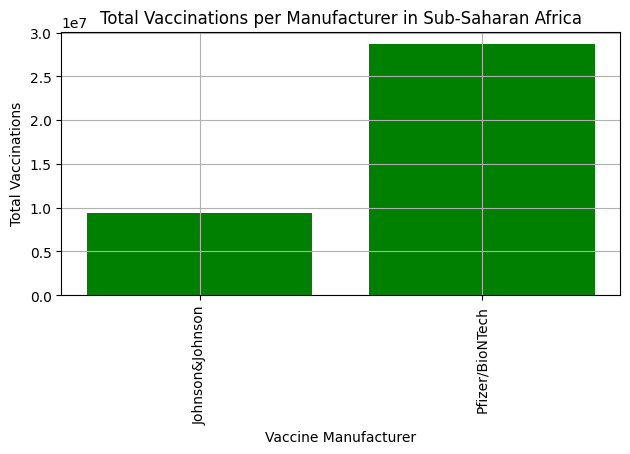

In [21]:
region_per_manufacturer_bar_chart(manufacturers_df, "Sub-Saharan Africa", 'g')

As seen on the graph, the top vaccines administered in Sub-Saharan Africa are Pfizer and Johnson&Johnson. This should be taken into consideration ahead of correlation calculations between vaccine rollout per manufacturer and stock value.

Caveat: This dataframe only includes South Africa for this region, resulting in a far from complete picture as major players such as the dozens of countries in this region. Thus, this would be more of a particular snapshot.

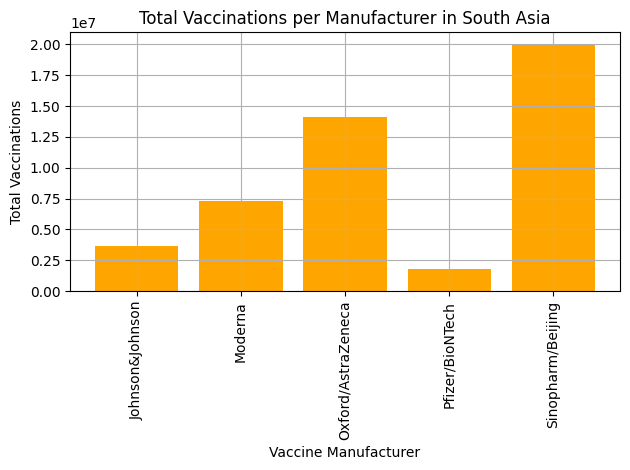

In [22]:
region_per_manufacturer_bar_chart(manufacturers_df, "South Asia", 'orange')

As seen on the graph, the top 3 vaccines administered in South Asia are SinoPharm, AstraZeneca and Moderna. This should be taken into consideration ahead of correlation calculations between vaccine rollout per manufacturer and stock value.

Caveat/limitation: Nepal is the only country provided in this dataset, resulting in limited analysis for South Asia as a whole.

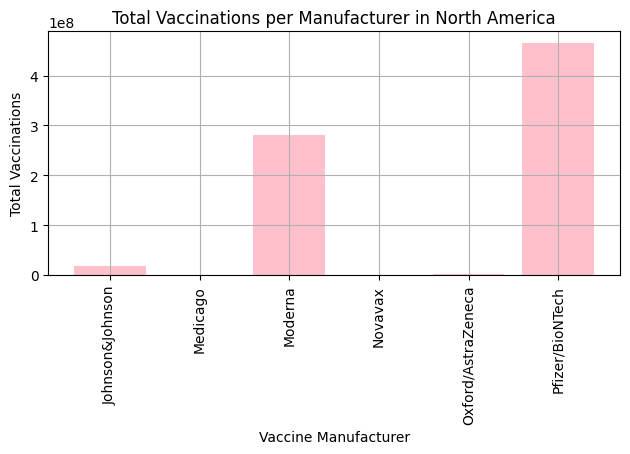

In [23]:
region_per_manufacturer_bar_chart(manufacturers_df, "North America", 'pink')

As seen on the graph, the top 3 vaccines administered in North America are Pfizer, Moderna and Johnson&Johnson. This should be taken into consideration ahead of correlation calculations between vaccine rollout per manufacturer and stock value.

Note: Major countries of North America such as Canada and the US, representing a very large portion of the population of the region are present in this dataset. This is more indicative of the reality of the situation than for South Asia for example where major players such as India and Pakistan are missing.

2.2 - LINEAR REGRESSION AND POTENTIAL CORRELATION BETWEEN STOCK VALUE FOR EACH MANUFACTURER AND VACCINE ROLLOUT

Following the analysis of the vaccine rollout per manufacturer for every region, I will use the information about the top vaccines worldwide to attempt to see if there is a correlation between this and the value of the stock of their company. Therein lies the main analysis of the hypothesis on whether or not vaccine rollout and the frequency of purcase of particular vaccines is in fact reflected in their stock value. Thus, we can confirm or deny whether this information was useful for investors to know which companies to invest in.

/var/folders/x8/wnndqnn93fb22g5jj7f1x0xr0000gn/T/ipykernel_34803/3003947721.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_manufacturers = region_manufacturer_data.groupby('region').apply(lambda x: x.nlargest(2, 'Total Vaccinations per Manufacturer')).reset_index(drop=True)
/var/folders/x8/wnndqnn93fb22g5jj7f1x0xr0000gn/T/ipykernel_34803/3003947721.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_vaccines))  # Using a colormap for distinct colors


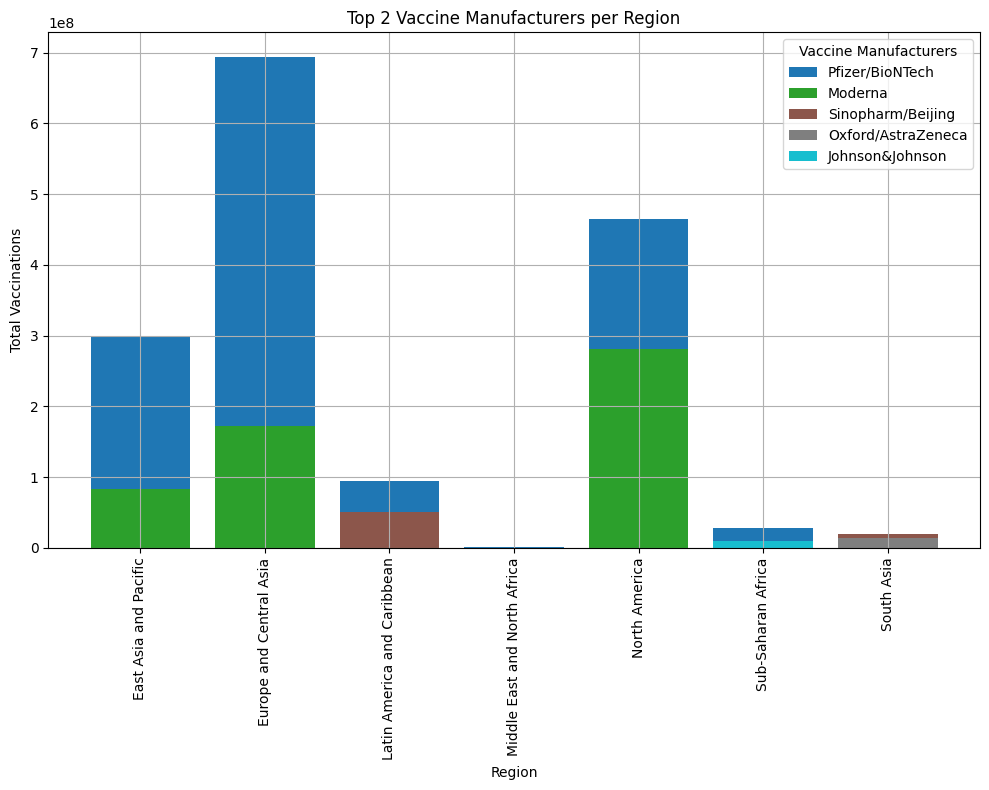

In [25]:
#Produce a summary bar graph that summarizes top 2 manufacturers per region, data that will be used for the linear regression

#Filter out Aggregates as this region is not properly defined
filtered_df = manufacturers_df[manufacturers_df["region"] != "Aggregates"]

#Get the maximum vaccinations per manufacturer for each country
max_vaccinations = filtered_df.groupby(['location', 'region', 'vaccine'])['Total Vaccinations per Manufacturer'].max().reset_index()

#Group by 'region' and 'vaccine' to sum the maximum values for each region based on the values for each country
region_manufacturer_data = max_vaccinations.groupby(['region', 'vaccine'])['Total Vaccinations per Manufacturer'].sum().reset_index()

#Identify the top 2 manufacturers per region
top_manufacturers = region_manufacturer_data.groupby('region').apply(lambda x: x.nlargest(2, 'Total Vaccinations per Manufacturer')).reset_index(drop=True)

#Create a unique color mapping for each manufacturer
unique_vaccines = top_manufacturers['vaccine'].unique()
colors = plt.cm.get_cmap('tab10', len(unique_vaccines))  # Using a colormap for distinct colors
color_mapping = {vaccine: colors(i) for i, vaccine in enumerate(unique_vaccines)}


#Plot each manufacturer separately
plt.figure(figsize=(10, 8))
for manufacturer in unique_vaccines:
    manufacturer_data = top_manufacturers[top_manufacturers['vaccine'] == manufacturer]
    plt.bar(manufacturer_data['region'], manufacturer_data['Total Vaccinations per Manufacturer'], 
            color=color_mapping[manufacturer], label=manufacturer)

# Create a legend using unique vaccine names
plt.legend(title="Vaccine Manufacturers")

plt.title("Top 2 Vaccine Manufacturers per Region")
plt.xlabel("Region")
plt.ylabel("Total Vaccinations")
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid()
plt.savefig("Output/top_vaccine_manufacturers_per_region.png")
plt.show()

This graph is meant to sum up the key piece of information for each specific bar graph in part 2.2, which is the top 2 manufacturers per region. As seen on the graph, Pfizer/BioNTech is the top manufacturer in every single region aside from South Asia, where the top manufacturer is Sinopharm. Nonetheless, they appear to be the top 2 manufacturers globally, which is the information we will use for the linear regression to follow. Moderna seems to be recurring as the 2nd top manufacturer per region except for South Asia, Latin America and Sub-Saharan Africa where they are AstraZeneca, Sinopharm and J&J respectively.

The main question is - is this reflected in their total stock volume and is there in fact a correlation between the vaccine rollout and the stock volume of their individual companies?

In [26]:
#Load dataset provided by teammate on vaccine manufacturer companies' stock volumes
#The following code was provided by my teammate Muskan:
csv_files = {
    'PFE': 'StockVolumeFiles/PFE_data.csv',
    'AZN': 'StockVolumeFiles/AZN_data.csv',
    'BNTX': 'StockVolumeFiles/BNTX_data.csv',
    'MRNA': 'StockVolumeFiles/MRNA_data.csv',
    
    'JNJ': 'StockVolumeFiles/JNJ_data.csv',
    'GSK': 'StockVolumeFiles/GSK_data.csv'
}
combined_data = []
for ticker, file in csv_files.items():

    data = pd.read_csv(file)
    
    data = data[['Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
    
    
    combined_data.append(data)

combined_df = pd.concat(combined_data, ignore_index=True)
combined_df.to_csv('combined_vaccine_stocks.csv', index=False)
combined_df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,PFE,2020-01-02,37.286530,37.333965,36.888046,37.134724,30.443775,16514072
1,PFE,2020-01-03,36.736244,37.229603,36.688805,36.935486,30.280436,14922848
2,PFE,2020-01-06,36.831120,37.001900,36.717270,36.888046,30.241545,15771951
3,PFE,2020-01-07,37.115749,37.125237,36.698292,36.764706,30.140430,20108107
4,PFE,2020-01-08,36.774193,37.210625,36.764706,37.058823,30.381554,16403507


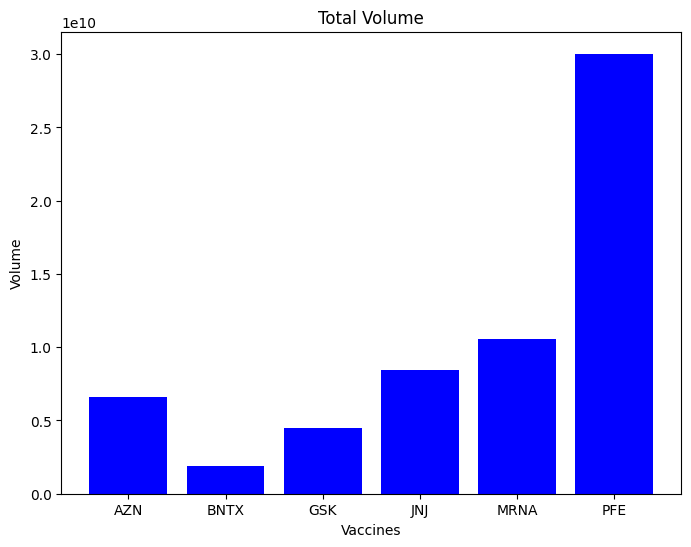

In [27]:
#Groupby and display columns of interest and bar graph of interest
#The following code was also provided by my teammate Muskan:
volume_df=combined_df.groupby('Ticker')['Volume'].sum().reset_index()
volume_df

plt.figure(figsize=(8, 6))
plt.bar(volume_df['Ticker'], volume_df['Volume'], color='blue')
plt.title('Total Volume')
plt.xlabel('Vaccines')
plt.ylabel('Volume')
plt.show()

The graph above shows that the company with the highest stock volume is Pfizer (PFE), which lines up with the results of the graph "Top Vaccine Manufacturer per Region". Now, it is time to perform a linear regression to see if there is indeed a sizable correlation between the two.

In [28]:
volume_df

,Ticker,Volume
0,AZN,6570490200
1,BNTX,1912097400
2,GSK,4504139000
3,JNJ,8456534600
4,MRNA,10536994000
5,PFE,30027788466


In [29]:
#Rename each manufacturer by its ticker symbol to allow for merging with stock volume dataset
top_manufacturers.loc[top_manufacturers['vaccine'] == 'Pfizer/BioNTech', 'vaccine'] = 'PFE'
top_manufacturers.loc[top_manufacturers['vaccine'] == 'Moderna', 'vaccine'] = 'MRNA'
top_manufacturers.loc[top_manufacturers['vaccine'] == 'Oxford/AstraZeneca', 'vaccine'] = 'AZN'
top_manufacturers.loc[top_manufacturers['vaccine'] == 'Johnson&Johnson', 'vaccine'] = 'JNJ'
#Drop Sinopharm rows as stock data is not available for this company
top_manufacturers.drop(top_manufacturers[top_manufacturers['vaccine'] == 'Sinopharm/Beijing'].index, inplace=True)
#Rename "vaccine" column to "Ticker" to allow for merging
top_manufacturers = top_manufacturers.rename(columns={"vaccine": "Ticker"})
top_manufacturers

,region,Ticker,Total Vaccinations per Manufacturer
0,East Asia and Pacific,PFE,299911417
1,East Asia and Pacific,MRNA,83402847
2,Europe and Central Asia,PFE,694178241
3,Europe and Central Asia,MRNA,172415351
4,Latin America and Caribbean,PFE,94335757
6,Middle East and North Africa,PFE,747236
7,Middle East and North Africa,MRNA,279006
8,North America,PFE,465168119
9,North America,MRNA,280657087
11,South Asia,AZN,14088349


In [33]:
#Merge the two datasets of interest
merged_top_manufacturer_df = pd.merge(top_manufacturers, volume_df, on="Ticker")
merged_top_manufacturer_df

,region,Ticker,Total Vaccinations per Manufacturer,Volume
0,East Asia and Pacific,PFE,299911417,30027788466
1,East Asia and Pacific,MRNA,83402847,10536994000
2,Europe and Central Asia,PFE,694178241,30027788466
3,Europe and Central Asia,MRNA,172415351,10536994000
4,Latin America and Caribbean,PFE,94335757,30027788466
5,Middle East and North Africa,PFE,747236,30027788466
6,Middle East and North Africa,MRNA,279006,10536994000
7,North America,PFE,465168119,30027788466
8,North America,MRNA,280657087,10536994000
9,South Asia,AZN,14088349,6570490200


The r^2-value is: 0.4218160697505016


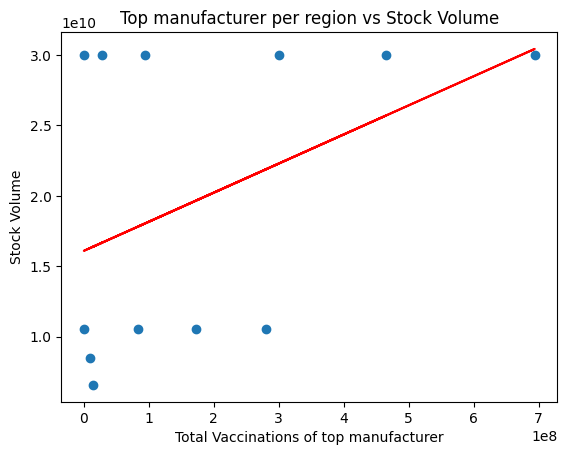

In [34]:
#Generate the linear regression and calculate the r-value
slope, intercept, r_value, p_value, std_err = linregress(merged_top_manufacturer_df["Total Vaccinations per Manufacturer"], merged_top_manufacturer_df["Volume"])
regression_line = slope * merged_top_manufacturer_df["Total Vaccinations per Manufacturer"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#Plot the scatter plot
plt.scatter(merged_top_manufacturer_df["Total Vaccinations per Manufacturer"], merged_top_manufacturer_df["Volume"], marker="o")
plt.title("Top manufacturer per region vs Stock Volume")
plt.xlabel("Total Vaccinations of top manufacturer")
plt.ylabel("Stock Volume")
plt.plot(merged_top_manufacturer_df["Total Vaccinations per Manufacturer"],regression_line,"r-")
plt.annotate(line_eq,(-55,11),fontsize=15,color="red")
print(f"The r^2-value is: {r_value}")
plt.savefig("Output/linear_regression.png")
plt.show()

As seen above, the r value is roughly 0.42, which indicates a very moderate correlation between total stock volume and vaccine rollout per manufacturer. Thus, it cannot be said with great confidence that there is a correlation between the two. Statistically, there isn't a strong enough correlation between the two. Stock volume is a measure of stock market activity and therefore a high volume indicates conviction among investors. It can be hypothesized that a company with a more successful vaccine rollout should also see a high/increasing stock volume. That said, this cannot be proven statistically.